# Data Loading & Inspection

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Set the dataset path
data_path = '../data/sp500.csv'


#Have to fix the dataset columns, as the header data is a bit unusual.
col_names = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

#Provide the correct column names using the 'names' argument + skip the first 3 rows.
df = pd.read_csv(data_path, skiprows=3, names=col_names)

### Check Header Data

In [3]:
#Check the head to confirm loading worked
print(df.head())


         Date      Close       High        Low  Open    Volume
0  1970-01-02  93.000000  93.540001  91.790001   0.0   8050000
1  1970-01-05  93.459999  94.250000  92.529999   0.0  11490000
2  1970-01-06  92.820000  93.809998  92.129997   0.0  11460000
3  1970-01-07  92.629997  93.379997  91.930000   0.0  10010000
4  1970-01-08  92.680000  93.470001  91.989998   0.0  10670000


### Parse The Data and set "Date" as Index

In [4]:
#Parse Dates: Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])  


#Set Index: Set the 'Date' column as the index
df.set_index('Date', inplace=True)


#running these lines twice will result in errors.

In [5]:
#Sort Index: Ensure the data is chronologically sorted (just in case).
df.sort_index(inplace=True)

#Convert price/volume columns to numeric
#Select all columns EXCEPT the index (which is already datetime)
numeric_cols = df.columns 
for col in numeric_cols:
    # errors='coerce' will turn non-numeric values into NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

### Handle Missing Values

In [6]:
print(f"\nMissing values per column BEFORE handling:\n{df.isnull().sum()}")
#There seem to be exactly zero missing values in the dataset.



Missing values per column BEFORE handling:
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


### Final Data verifications

In [7]:
#Verify Data Types again
print("\nData types after cleaning:")
print(df.dtypes)
print("\nCleaned data head:")
print(df.head())
print("\nCleaned data tail:")
print(df.tail())


Data types after cleaning:
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

Cleaned data head:
                Close       High        Low  Open    Volume
Date                                                       
1970-01-02  93.000000  93.540001  91.790001   0.0   8050000
1970-01-05  93.459999  94.250000  92.529999   0.0  11490000
1970-01-06  92.820000  93.809998  92.129997   0.0  11460000
1970-01-07  92.629997  93.379997  91.930000   0.0  10010000
1970-01-08  92.680000  93.470001  91.989998   0.0  10670000

Cleaned data tail:
                  Close         High          Low         Open      Volume
Date                                                                      
2024-12-24  6040.040039  6040.100098  5981.439941  5984.629883  1757720000
2024-12-26  6037.589844  6049.750000  6007.370117  6024.970215  2904530000
2024-12-27  5970.839844  6006.169922  5932.950195  6006.169922  3159610000
2024-12-30  5906.939941  5940.790

# Exploratory Data Analysis

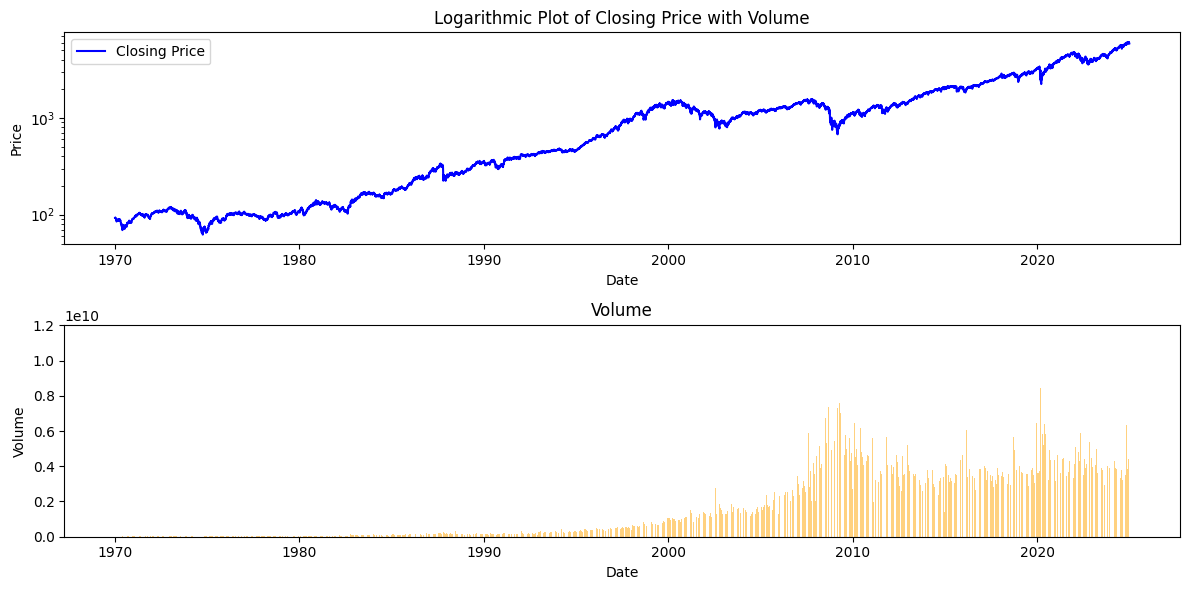

In [8]:
#Create Logarithmic plot of the closing price.
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)  # First subplot for price
plt.plot(df['Close'], label='Closing Price', color='blue')
plt.title('Logarithmic Plot of Closing Price with Volume')
plt.xlabel('Date')
plt.ylabel('Price')
plt.yscale('log')
plt.legend()

plt.subplot(2, 1, 2)  # Second subplot for volume
plt.bar(df.index, df['Volume'], color='orange', alpha=0.5)
plt.title('Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.tight_layout()
plt.show()

Some small notes:
- Trading volume has increased significantly from the early 2000s (in absolute number of shares); most likely due to the internet and easier accesibility to brokers.
- Trading volume increases during crashes, and then slightly goes lower until stabilizing during the bull market again.
- The drawdown from the 2007 peak to the 2009 low was >50% (Financial crisis), one of the deepest percentage drops in the post-WWII era.
- The Dot-com bust (2000-2002) was also very deep (especially for the Nasdaq) and arguably longer in duration.
- The 1973-1974 bear market was also very severe (~45-50% drop) and occurred during high inflation (stagflation).

### Calculate and Visualize Returns

In [9]:
import matplotlib.pyplot as plt
import numpy as np 


# Daily percentage change
df['Daily_Return'] = df['Close'].pct_change() * 100


#Remove the first NaN value created by pct_change() or shift()
df.dropna(subset=['Daily_Return'], inplace=True)


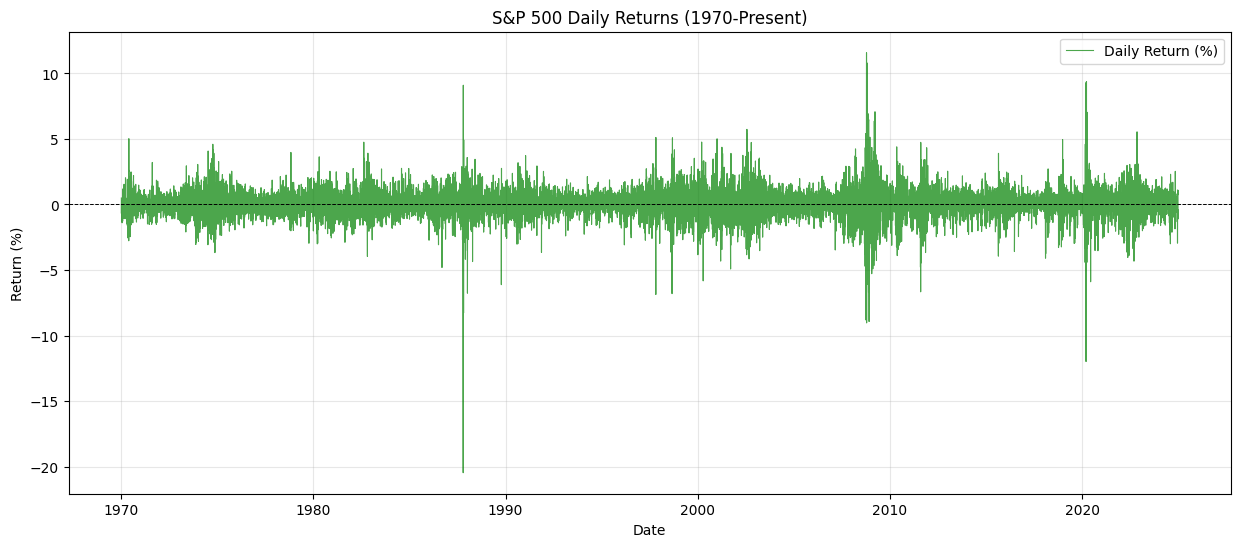

In [10]:
#Visualize Daily Returns
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Daily_Return'], label='Daily Return (%)',
         color='green', alpha=0.7, linewidth=0.8)
plt.title('S&P 500 Daily Returns (1970-Present)')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.axhline(0, color='black', linestyle='--', linewidth=0.7) # Add a line at 0%
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Notes:
- That enormous downward spike in late 1987 is Black Monday. The market had experienced a strong bull run in the preceding years.
- It was a shocking event because it happened so quickly and wasn't immediately tied to a specific catastrophic economic news event (unlike, say, the Lehman Brothers collapse triggering the worst of 2008). It highlighted the risks of automated trading strategies and market interconnectedness.

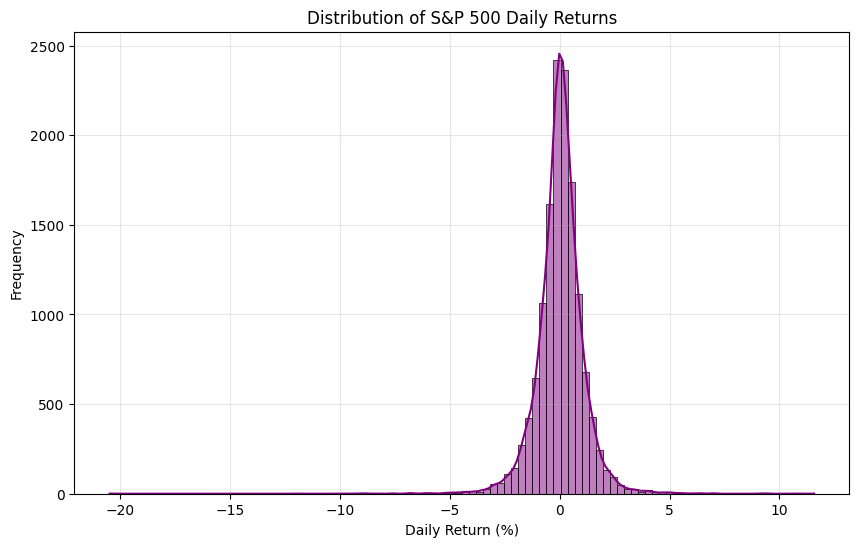

In [11]:
#Visualize Distribution of Daily Returns with a Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily_Return'], bins=100, kde=True, color='purple')
plt.title('Distribution of S&P 500 Daily Returns')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

Notes:
- The center looks normally distributed, but if you look at the "fat tails", you can see that extreme events (like big crash days or big rally days) happen much more frequently than a simple normal distribution would predict.
- On most days, the market movement is relatively small, clustering around zero change.

In [12]:
#Basic Stats for Daily Returns
print("\n--- Daily Return Statistics ---")
print(df['Daily_Return'].describe())

#Calculate skewness and kurtosis (measures of asymmetry and 'tailedness')
print(f"Skewness: {df['Daily_Return'].skew():.4f}")
print(f"Kurtosis: {df['Daily_Return'].kurt():.4f}") # Excess Kurtosis (Kurtosis - 3)


--- Daily Return Statistics ---
count    13870.000000
mean         0.035766
std          1.079960
min        -20.466931
25%         -0.459768
50%          0.047987
75%          0.558068
max         11.580037
Name: Daily_Return, dtype: float64
Skewness: -0.6125
Kurtosis: 18.5992


### Moving Averages & Price Trends

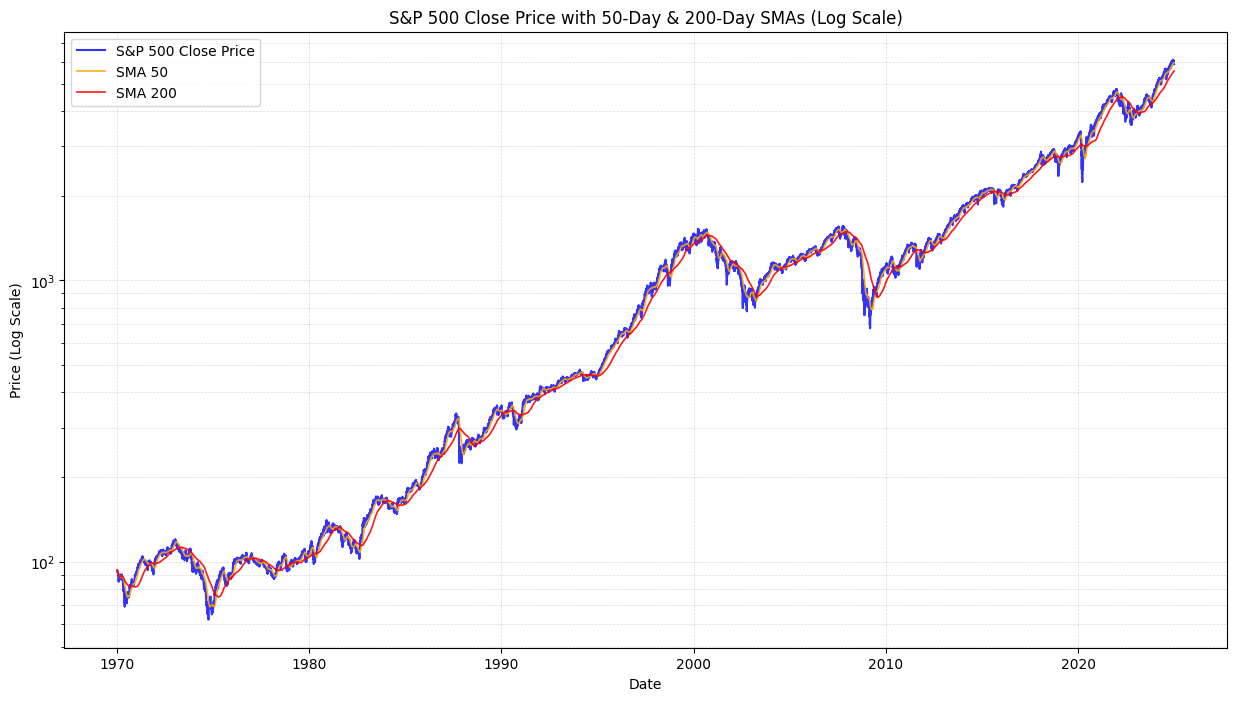

In [13]:
short_window = 50 #medium trend
long_window = 200 #long-term trend

#Calculate Simple Moving Averages (SMAs)
if 'Close' in df.columns and pd.api.types.is_numeric_dtype(df['Close']):
    df['SMA_50'] = df['Close'].rolling(window=short_window, min_periods=1).mean() # min_periods=1 handles the start of the series
    df['SMA_200'] = df['Close'].rolling(window=long_window, min_periods=1).mean()
else:
    print("Error: 'Close' column not found or is not numeric.")
    

#Visualize Price with Moving Averages
plt.figure(figsize=(15, 8))

#Plot Closing Price with logarithmic scale
plt.plot(df.index, df['Close'], label='S&P 500 Close Price', color='blue', alpha=0.8, linewidth=1.5)
plt.yscale('log') # Use log scale to better visualize relative changes

#Plot SMAs
if 'SMA_50' in df.columns:
    plt.plot(df.index, df['SMA_50'], label=f'SMA {short_window}', color='orange', alpha=0.9, linewidth=1.2)
if 'SMA_200' in df.columns:
    plt.plot(df.index, df['SMA_200'], label=f'SMA {long_window}', color='red', alpha=0.9, linewidth=1.2)

#Add Plot Enhancements
plt.title(f'S&P 500 Close Price with {short_window}-Day & {long_window}-Day SMAs (Log Scale)')
plt.xlabel('Date')
plt.ylabel('Price (Log Scale)')
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.5) # Grid for log scale
plt.show()


Notes:
- When the price is consistently above both the SMA 50 and SMA 200, it generally indicates a strong uptrend.
- When the price is consistently below both SMAs, it generally indicates a strong downtrend (bear market).

- Golden Cross: When the SMA 50 crosses above the SMA 200. Often considered a bullish signal confirming an uptrend may be starting or resuming. Find examples on the chart (e.g., after the 2009 bottom, after the 2020 bottom).
- Death Cross: When the SMA 50 crosses below the SMA 200. Often considered a bearish signal confirming a downtrend may be starting or resuming. Find examples (e.g., during 2001, 2008, 2022).

### Drawdown Analysis

The drawdown plot explicitly quantifies the percentage loss from the most recent peak. This gives you a direct measure of how painful each downturn was in relative terms

Drawdown is a fundamental concept in risk management and portfolio theory. Understanding historical drawdowns is essential context if you were ever to think about deploying a model or strategy based on this analysis.

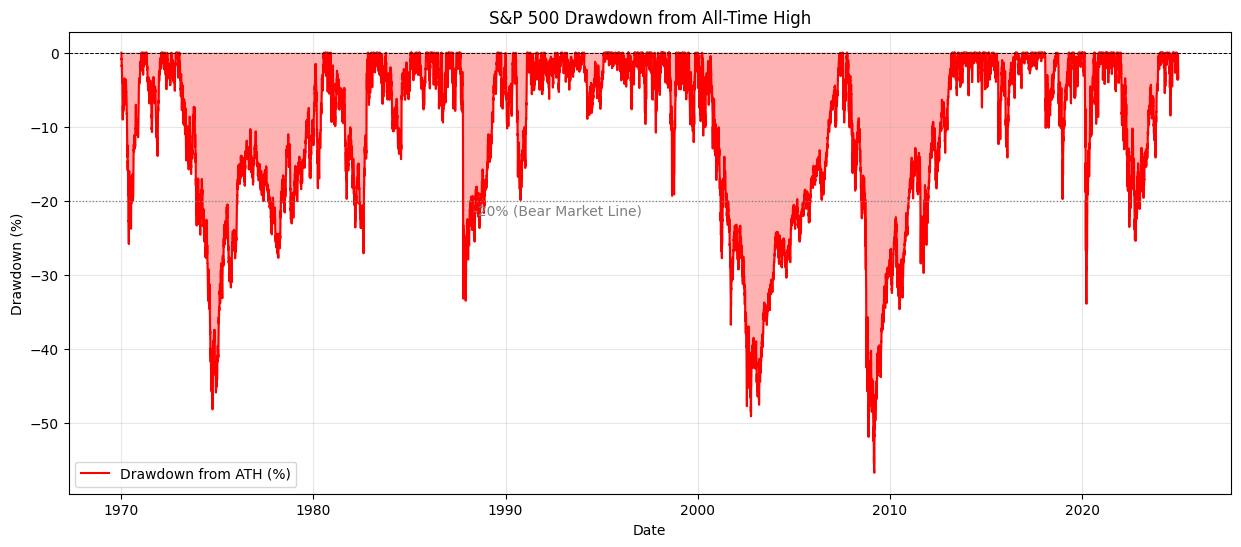


Largest Drawdown from ATH: -56.78% on 2009-03-09


In [15]:
import matplotlib.pyplot as plt
import pandas as pd 


#Calculate the rolling maximum close price over the entire history (Cumulative Max)
df['Peak_ATH'] = df['Close'].cummax()

#Calculate the drawdown from the All-Time High (ATH)
#Drawdown is calculated as (Current Price - Peak Price) / Peak Price
df['Drawdown_ATH_pct'] = ((df['Close'] - df['Peak_ATH']) / df['Peak_ATH']) * 100


#Visualize Drawdown from ATH
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Drawdown_ATH_pct'], label='Drawdown from ATH (%)', color='red')
plt.fill_between(df.index, df['Drawdown_ATH_pct'], 0, color='red', alpha=0.3) #Fill area below 0
plt.title('S&P 500 Drawdown from All-Time High')
plt.xlabel('Date')
plt.ylabel('Drawdown (%)')
plt.axhline(0, color='black', linestyle='--', linewidth=0.7) #Line at 0% drawdown
plt.axhline(-20, color='grey', linestyle=':', linewidth=0.9) #Common Bear Market Threshold (-20%)
plt.text(df.index[len(df)//3], -20.5, '-20% (Bear Market Line)', color='grey', va='top') #Label -20% line
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

#Find and Print Major Drawdowns
#Find the minimum drawdown values (largest percentage drops)
min_drawdown = df['Drawdown_ATH_pct'].min()
date_min_drawdown = df['Drawdown_ATH_pct'].idxmin()
print(f"\nLargest Drawdown from ATH: {min_drawdown:.2f}% on {date_min_drawdown.date()}")

#Identify periods where drawdown exceeded certain thresholds (e.g., -20%, -30%, -40%)
bear_market_periods = df[df['Drawdown_ATH_pct'] < -20]
severe_bear_market_periods = df[df['Drawdown_ATH_pct'] < -40]



- The Y-axis is Crucial: It's showing the percentage (%) loss of the S&P 500 index compared to its highest point reached prior to that date (All-Time High or ATH).

- Zero Line (0%): When the red line is at 0%, it means the index is currently at a new all-time high.

- Below Zero: Anytime the red line is below 0%, the market is "underwater" – it hasn't yet recovered to its previous peak value. The lower the value, the further below the peak it is.

In [16]:
#Find the minimum drawdown during known crash periods (approximate date ranges)
crash_periods = {
    "Stagflation": ('1973-01-01', '1974-12-31'),
    "Black Monday Era": ('1987-08-01', '1988-12-31'), 
    "DotCom Bust": ('2000-03-01', '2003-03-31'),
    "Financial Crisis": ('2007-10-01', '2009-06-30'),
    "COVID Crash": ('2020-02-01', '2020-06-30'),
    "2022 Bear": ('2022-01-01', '2023-01-31') 
}

print("\n--- Max Drawdown during Key Periods ---")
for name, (start, end) in crash_periods.items():
    period_df = df.loc[start:end]
    if not period_df.empty:
        min_dd = period_df['Drawdown_ATH_pct'].min()
        date_min_dd = period_df['Drawdown_ATH_pct'].idxmin()
        print(f"{name}: {min_dd:.2f}% on {date_min_dd.date()}")


--- Max Drawdown during Key Periods ---
Stagflation: -48.20% on 1974-10-03
Black Monday Era: -33.51% on 1987-12-04
DotCom Bust: -49.15% on 2002-10-09
Financial Crisis: -56.78% on 2009-03-09
COVID Crash: -33.92% on 2020-03-23
2022 Bear: -25.43% on 2022-10-12


- Significant drawdowns (>20% bear markets) are not rare; they happen roughly once a decade or so, although their severity varies greatly.

### Volatility Analysis

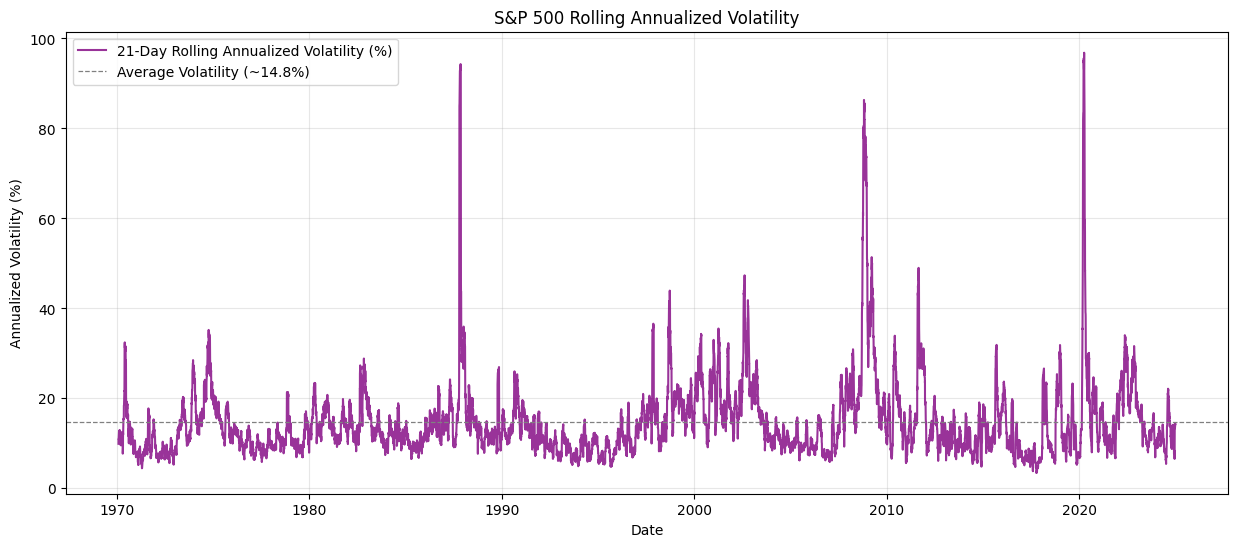


--- Annualized Volatility Statistics ---
count    13850.000000
mean        14.788228
std          8.811482
min          3.472766
25%          9.777898
50%         12.664000
75%         17.161650
max         96.834692
Name: Annualized_Volatility, dtype: float64


In [17]:
#Define Volatility Window and Annualization Factor
volatility_window = 21 #(approx. 1 trading month)

trading_days_per_year = 252 # Standard assumption for annualization


#Calculate Rolling Volatility
#Check if 'Daily_Return' exists
if 'Daily_Return' in df.columns:
    # Calculate rolling standard deviation of daily returns
    df['Rolling_Std_Dev'] = df['Daily_Return'].rolling(window=volatility_window, min_periods=volatility_window).std() 


    df['Annualized_Volatility'] = df['Rolling_Std_Dev'] * np.sqrt(trading_days_per_year)
else:
    print("Error: 'Daily_Return' column not found. Please calculate it first.")
   

#Visualize Annualized Volatility
if 'Annualized_Volatility' in df.columns:
    plt.figure(figsize=(15, 6))
    plt.plot(df.index, df['Annualized_Volatility'], label=f'{volatility_window}-Day Rolling Annualized Volatility (%)', color='purple', alpha=0.8)
    plt.title('S&P 500 Rolling Annualized Volatility')
    plt.xlabel('Date')
    plt.ylabel('Annualized Volatility (%)')

    #Add horizontal lines for context (e.g., average volatility)
    avg_volatility = df['Annualized_Volatility'].mean()
    plt.axhline(avg_volatility, color='grey', linestyle='--', linewidth=0.9, label=f'Average Volatility (~{avg_volatility:.1f}%)')

    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    #Print summary statistics for volatility
    print("\n--- Annualized Volatility Statistics ---")
    print(df['Annualized_Volatility'].describe())


- The COVID crash wasn't necessarily the deepest in terms of total percentage loss from the peak, but it was arguably the most violent in terms of the speed and magnitude of daily price fluctuations compressed into a very short time, leading to the highest volatility spike.

- The massive spikes during Black Monday (1987) and the GFC (2008-2009) confirm these were periods of extreme market stress and price fluctuation. The relatively lower (though still elevated) volatility during the DotCom bust (2000-2002) aligns perfectly with my previous observation that it was a more gradual, grinding decline.

### Augmented Dickey-Fuller (ADF) test 

In [21]:
from statsmodels.tsa.stattools import adfuller


#Define a function for cleaner ADF test output
def perform_adf_test(series, series_name):
    """Performs ADF test and prints results."""
    series_cleaned = series.dropna()
    if series_cleaned.empty:
        print(f"Skipping ADF test for {series_name}: Series is empty after dropping NaNs.")
        return

    print(f"\nADF Test Results for: {series_name}")
    result = adfuller(series_cleaned)

    #Extract and print results
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.4f}')

    #Interpret the results based on p-value
    if result[1] <= 0.05:
        print(f"\nConclusion: Reject the null hypothesis (p <= 0.05). The '{series_name}' series is likely STATIONARY.")
    else:
        print(f"\nConclusion: Fail to reject the null hypothesis (p > 0.05). The '{series_name}' series is likely NON-STATIONARY.")

#Perform ADF Test on Closing Prices
if 'Close' in df.columns:
    perform_adf_test(df['Close'], 'S&P 500 Close Price')
else:
    print("Column 'Close' not found.")

#Perform ADF Test on Daily Returns
if 'Daily_Return' in df.columns:
    perform_adf_test(df['Daily_Return'], 'S&P 500 Daily Return')
else:
    print("Column 'Daily_Return' not found.")


ADF Test Results for: S&P 500 Close Price
ADF Statistic: 4.5885
p-value: 1.0000
Critical Values:
	1%: -3.4308
	5%: -2.8617
	10%: -2.5669

Conclusion: Fail to reject the null hypothesis (p > 0.05). The 'S&P 500 Close Price' series is likely NON-STATIONARY.

ADF Test Results for: S&P 500 Daily Return
ADF Statistic: -20.8569
p-value: 0.0000
Critical Values:
	1%: -3.4308
	5%: -2.8617
	10%: -2.5669

Conclusion: Reject the null hypothesis (p <= 0.05). The 'S&P 500 Daily Return' series is likely STATIONARY.


### Autocorrelation Analysis (ACF & PACF)


- Autocorrelation Function (ACF): Measures the correlation between the time series and lagged versions of itself (correlation between Return(t) and Return(t-k) for various lags k).

- Partial Autocorrelation Function (PACF): Measures the correlation between the time series and a lagged version of itself after removing the effects of the intermediate lags. (Correlation between Return(t) and Return(t-k) controlling for Return(t-1), Return(t-2), ..., Return(t-k+1)).

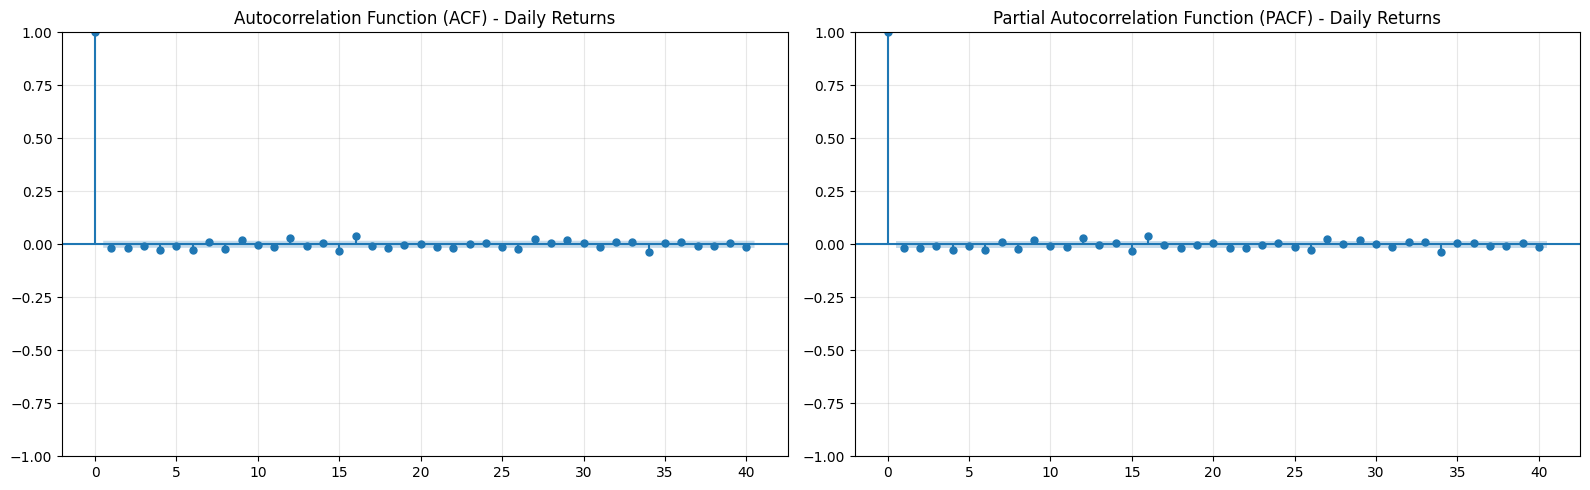

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import pandas as pd 


if 'Daily_Return' in df.columns:
    returns_cleaned = df['Daily_Return'].dropna()

    if not returns_cleaned.empty:
        fig, axes = plt.subplots(1, 2, figsize=(16, 5))

        
        #lags=40, shows correlations up to 40 days ago
        plot_acf(returns_cleaned, lags=40, ax=axes[0], title='Autocorrelation Function (ACF) - Daily Returns')
        axes[0].grid(True, alpha=0.3)

        #Plot PACF
        plot_pacf(returns_cleaned, lags=40, ax=axes[1], title='Partial Autocorrelation Function (PACF) - Daily Returns', method='ywm') # 'ywm' is often preferred
        axes[1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()
    else:
        print("Daily_Return series is empty after dropping NaNs, cannot plot ACF/PACF.")
else:
    print("Column 'Daily_Return' not found.")

- In highly efficient markets like the S&P 500, you often find very few or no significant lags beyond lag 0 in the returns series, especially for longer lags.